# Coursework 1: Image filtering

In this coursework you will practice techniques for image filtering. The coursework includes coding questions and written questions. Please read both the text and the code in this notebook to get an idea what you are expected to implement.

## What to do?

* Complete and run the code using `jupyter-lab` or `jupyter-notebook` to get the results.

* Export (File | Save and Export Notebook As...) the notebook as a PDF file, which contains your code, results and answers, and upload the PDF file onto [Scientia](https://scientia.doc.ic.ac.uk).

* Instead of clicking the Export button, you can also run the following command instead: `jupyter nbconvert coursework_01_solution.ipynb --to pdf`

* If Jupyter complains about some problems in exporting, it is likely that pandoc (https://pandoc.org/installing.html) or latex is not installed, or their paths have not been included. You can install the relevant libraries and retry. Alternatively, use the Print function of your browser to export the PDF file.

* If Jupyter-lab does not work for you at the end (we hope not), you can use Google Colab to write the code and export the PDF file.

## Dependencies:

You need to install Jupyter-Lab (https://jupyterlab.readthedocs.io/en/stable/getting_started/installation.html) and other libraries used in this coursework, such as by running the command:
`pip3 install [package_name]`


In [5]:
# Import libaries (provided)
import imageio.v3 as imageio
import numpy as np
import matplotlib.pyplot as plt
import noise
import scipy
import scipy.signal
import math
import time

## 1. Moving average filter (20 points).

Read the provided input image, add noise to the image and design a moving average filter for denoising.

You are expected to design the kernel of the filter and then perform 2D image filtering using the function `scipy.signal.convolve2d()`.

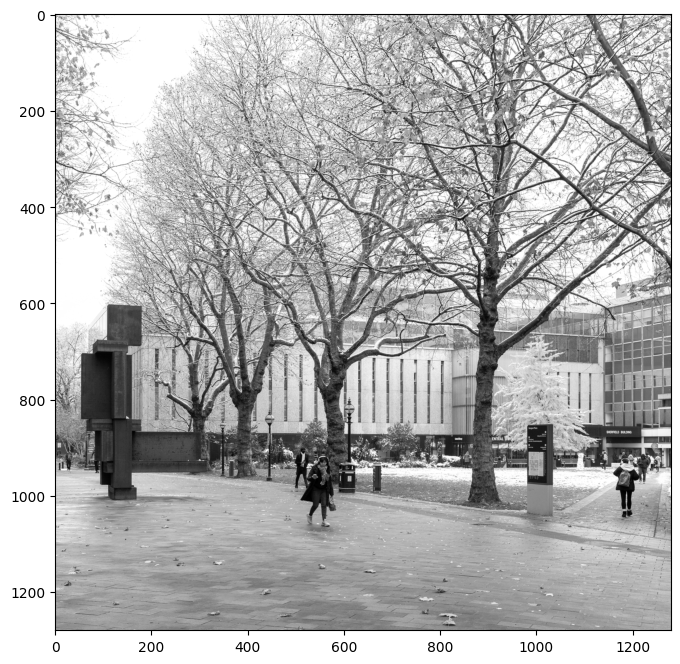

In [6]:
# Read the image (provided)
image = imageio.imread('campus_snow.jpg')
plt.imshow(image, cmap='gray')
plt.gcf().set_size_inches(8, 8)

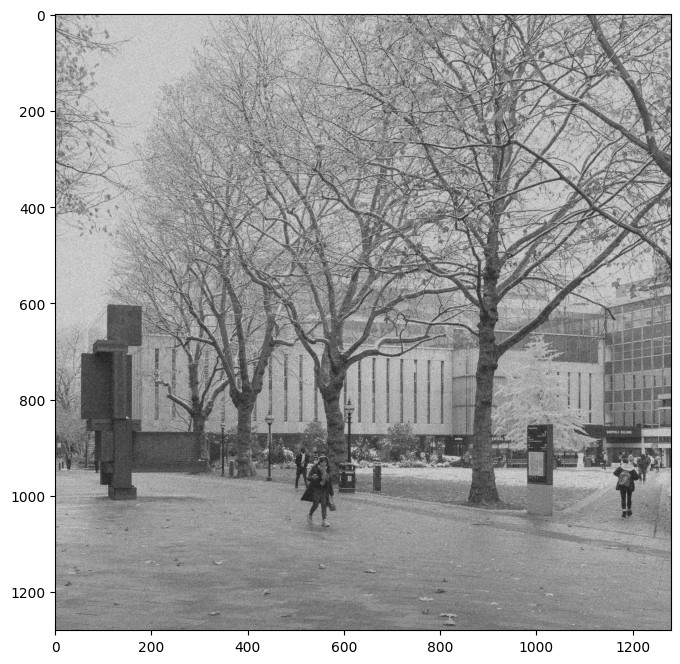

In [7]:
# Corrupt the image with Gaussian noise (provided)
image_noisy = noise.add_noise(image, 'gaussian')
plt.imshow(image_noisy, cmap='gray')
plt.gcf().set_size_inches(8, 8)

### Note: from now on, please use the noisy image as the input for the filters.

### 1.1 Filter the noisy image with a 3x3 moving average filter. Show the filtering results.

Filter h:
[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


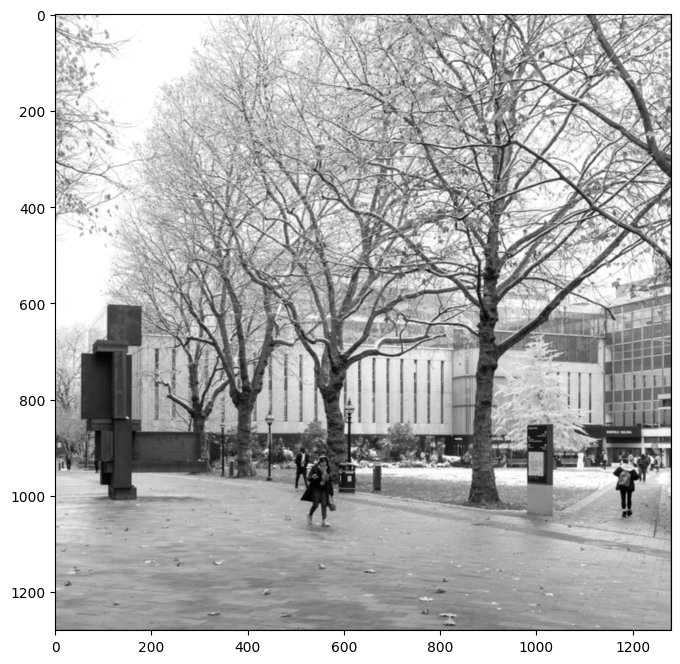

In [10]:
# Design the filter h
n = 3
h = np.ones((n, n)) / (n ** 2)

# Convolve the corrupted image with h using scipy.signal.convolve2d function
### Insert your code ###
image_filtered = scipy.signal.convolve2d(image, h, mode='same')

# Print the filter (provided)
print('Filter h:')
print(h)

# Display the filtering result (provided)
plt.imshow(image_filtered, cmap='gray')
plt.gcf().set_size_inches(8, 8)

### 1.2 Filter the noisy image with a 11x11 moving average filter.

Filter h:
[[0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.008

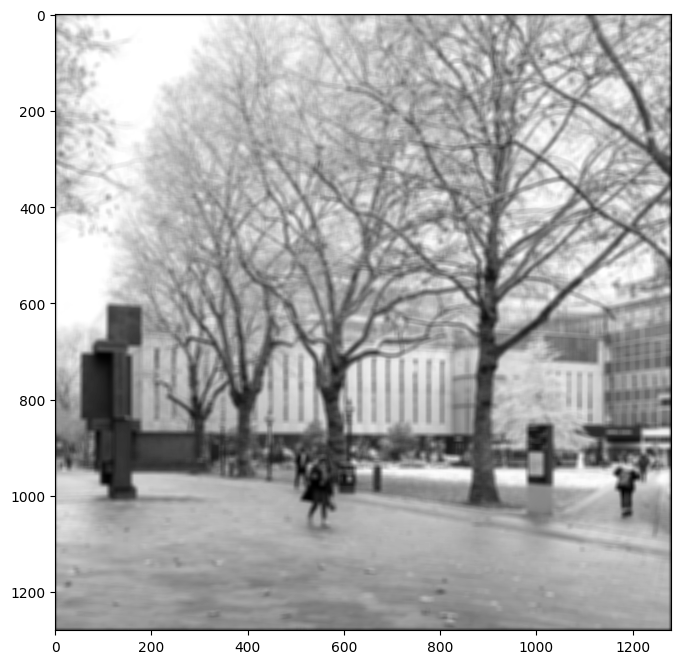

In [11]:
# Design the filter h
n = 11
h = np.ones((n, n)) / (n ** 2)

# Convolve the corrupted image with h using scipy.signal.convolve2d function
image_filtered = scipy.signal.convolve2d(image, h, mode='same')

# Print the filter (provided)
print('Filter h:')
print(h)

# Display the filtering result (provided)
plt.imshow(image_filtered, cmap='gray')
plt.gcf().set_size_inches(8, 8)

### 1.3 Comment on the filtering results. How do different kernel sizes influence the filtering results?

The 3x3 filter preserves more image details: Edges and high-frequency information are less affected, resulting in a sharper image with some remaining noise.

The 11x11 filter provides stronger noise reduction: It averages over a larger area, smoothing out more noise but also blurring edges and finer details. The image appears smoother but lacks some crispness.

Kernel size directly influences this balance: Larger kernels like 11x11 average over a wider area, effectively suppressing noise but losing image sharpness. Smaller kernels like 3x3 focus on localized neighborhoods, preserving details but leaving some noise visible.

The optimal kernel size depends on the specific image and desired outcome. If noise reduction is the priority and some detail loss is acceptable, a larger kernel might be preferable. If preserving image sharpness is crucial, a smaller kernel like 3x3 might be a better choice.


## 2. Edge detection (56 points).

Perform edge detection using Sobel filtering, as well as Gaussian + Sobel filtering.

### 2.1 Implement 3x3 Sobel filters and convolve with the noisy image.

sobel_x:
[[-1  0  1]
 [-2  0  2]
 [-1  0  1]]
sobel_y:
[[-1 -2 -1]
 [ 0  0  0]
 [ 1  2  1]]


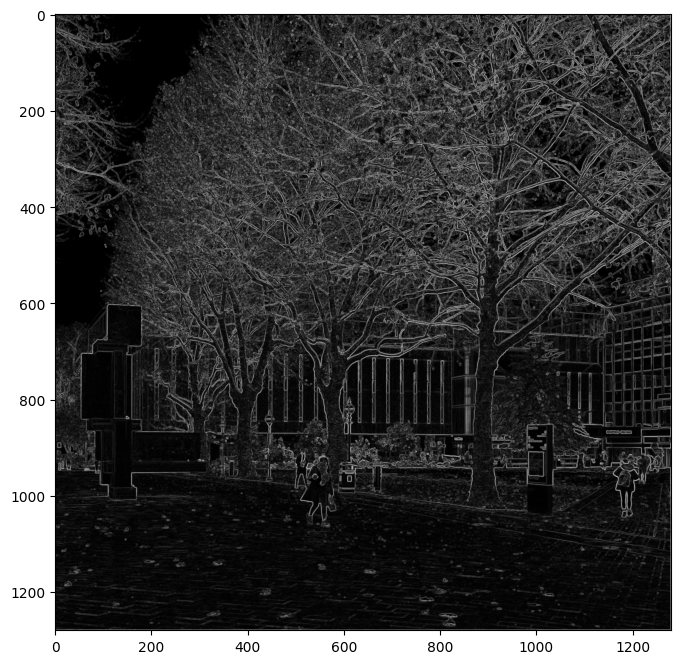

In [12]:
# Design the filters
sobel_x = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])

sobel_y = np.array([[-1, -2, -1],
                    [0, 0, 0],
                    [1, 2, 1]])

# Image filtering
filtered_x = scipy.signal.convolve2d(image, sobel_x, mode='same')
filtered_y = scipy.signal.convolve2d(image, sobel_y, mode='same')

# Calculate the gradient magnitude
grad_mag = np.sqrt(filtered_x ** 2 + filtered_y ** 2)

# Print the filters (provided)
print('sobel_x:')
print(sobel_x)
print('sobel_y:')
print(sobel_y)

# Display the magnitude map (provided)
plt.imshow(grad_mag, cmap='gray')
plt.gcf().set_size_inches(8, 8)

### 2.2 Implement a function that generates a 2D Gaussian filter given the parameter $\sigma$.

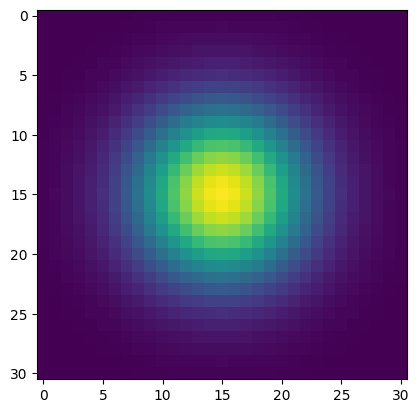

In [13]:
# Design the Gaussian filter
def gaussian_filter_2d(sigma):
    # sigma: the parameter sigma in the Gaussian kernel (unit: pixel)
    # assume sigma > 0
    # return: a 2D array for the Gaussian kernel

    size = int(2 * np.ceil(3 * sigma) + 1)
    x, y = np.meshgrid(np.arange(-(size // 2), size // 2 + 1), np.arange(-(size // 2), size // 2 + 1))
    h = np.exp(-(x ** 2 + y ** 2) / (2 * sigma ** 2))
    h /= np.sum(h)
    return h


# Visualise the Gaussian filter when sigma = 5 pixel (provided)
sigma = 5
h = gaussian_filter_2d(sigma)
plt.imshow(h)

### 2.3 Perform Gaussian smoothing ($\sigma$ = 5 pixels) and evaluate the computational time for Gaussian smoothing. After that, perform Sobel filtering and show the gradient magnitude map.

Gaussian smoothing (σ=5) time: 2.8930 seconds


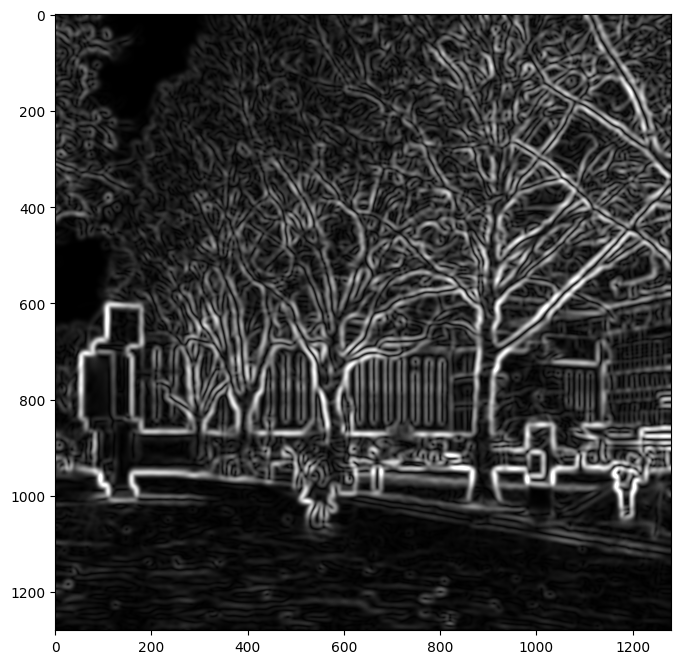

In [24]:
# Construct the Gaussian filter
sigma = 5
kernel = gaussian_filter_2d(sigma)

# Perform Gaussian smoothing and count time
t_start = time.time()
filtered_img = scipy.signal.convolve2d(image, kernel, mode='same', boundary='symm')
t_end = time.time()
delta_t = t_end - t_start

print(f"Gaussian smoothing (σ={sigma}) time: {delta_t:.4f} seconds")

# Image filtering
sobel_x = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])
sobel_y = np.array([[-1, -2, -1],
                    [0, 0, 0],
                    [1, 2, 1]])

# Calculate the gradient magnitude
filtered_x = scipy.signal.convolve2d(filtered_img, sobel_x, mode='same', boundary='symm')
filtered_y = scipy.signal.convolve2d(filtered_img, sobel_y, mode='same', boundary='symm')
grad_mag = np.sqrt(filtered_x ** 2 + filtered_y ** 2)

# Display the gradient magnitude map (provided)
plt.imshow(grad_mag, cmap='gray', vmin=0, vmax=100)
plt.gcf().set_size_inches(8, 8)

### 2.4 Implement a function that generates a 1D Gaussian filter given the parameter $\sigma$. Generate 1D Gaussian filters along x-axis and y-axis respectively.

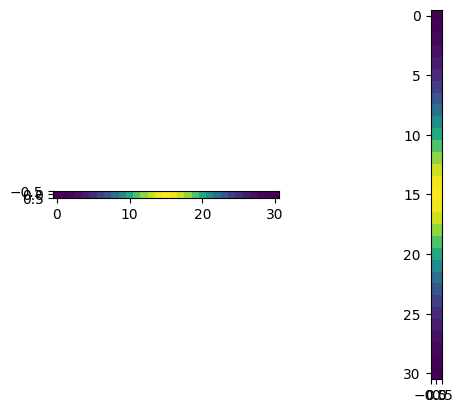

In [17]:
# Design the Gaussian filter
def gaussian_filter_1d(sigma):
    # sigma: the parameter sigma in the Gaussian kernel (unit: pixel)
    # assume sigma > 0
    # return: a 1D array for the Gaussian kernel

    size = int(2 * np.ceil(3 * sigma) + 1)
    x = np.arange(-(size // 2), size // 2 + 1)
    h = np.exp(-(x ** 2) / (2 * sigma ** 2))
    h /= np.sum(h)
    return h


# sigma = 5 pixel (provided)
sigma = 5

kernel = gaussian_filter_1d(sigma)

# The Gaussian filter along x-axis. Its shape is (1, sz).
h_x = kernel.reshape((1, -1))

# The Gaussian filter along y-axis. Its shape is (sz, 1).
h_y = kernel.reshape((-1, 1))

# Visualise the filters (provided)
plt.subplot(1, 2, 1)
plt.imshow(h_x)
plt.subplot(1, 2, 2)
plt.imshow(h_y)

### 2.6 Perform Gaussian smoothing ($\sigma$ = 5 pixels) using two separable filters and evaluate the computational time for separable Gaussian filtering. After that, perform Sobel filtering, show the gradient magnitude map and check whether it is the same as the previous one without separable filtering.

Separable Gaussian smoothing (σ=5) time: 0.5550 seconds
Mean difference between gradient magnitude images: 3.7646


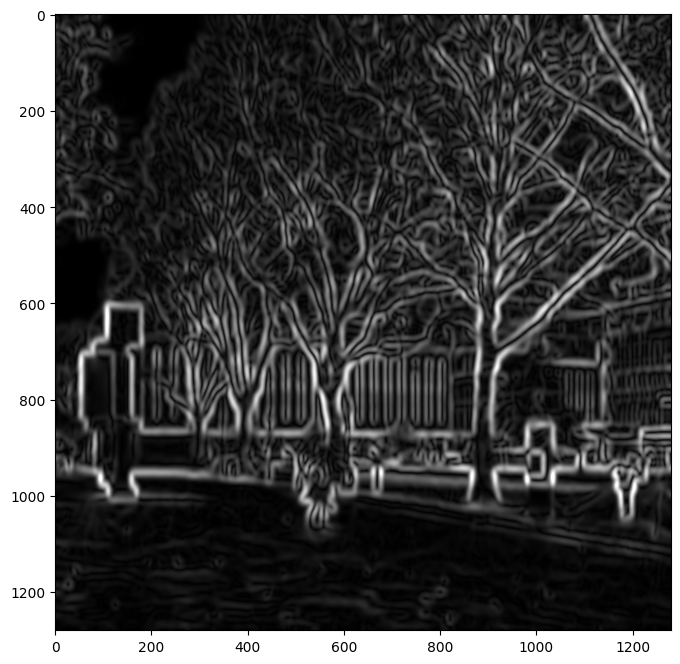

In [25]:
sigma = 5

# Perform separable Gaussian smoothing and count time
t_start = time.time()

kernel = gaussian_filter_1d(sigma)
filtered_x = scipy.signal.convolve2d(image, kernel.reshape((1, -1)), mode='same', boundary='symm')
filtered_img_sep = scipy.signal.convolve2d(filtered_img, kernel.reshape((-1, 1)), mode='same', boundary='symm')

t_end = time.time()
delta_t_sep = t_end - t_start
print(f"Separable Gaussian smoothing (σ={sigma}) time: {delta_t_sep:.4f} seconds")

# Image filtering
sobel_x = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])
sobel_y = np.array([[-1, -2, -1],
                    [0, 0, 0],
                    [1, 2, 1]])

# Calculate the gradient magnitude

filtered_x_sep = scipy.signal.convolve2d(filtered_img_sep, sobel_x, mode='same', boundary='symm')
filtered_y_sep = scipy.signal.convolve2d(filtered_img_sep, sobel_y, mode='same', boundary='symm')
grad_mag2 = np.sqrt(filtered_x_sep ** 2 + filtered_y_sep ** 2)

# Display the gradient magnitude map (provided)
plt.imshow(grad_mag2, cmap='gray', vmin=0, vmax=100)
plt.gcf().set_size_inches(8, 8)

# Check the difference between the current gradient magnitude map
# and the previous one produced without separable filtering. You
# can report the mean difference between the two.
diff = np.mean(np.abs(grad_mag - grad_mag2))
print(f"Mean difference between gradient magnitude images: {diff:.4f}")

### 2.7 Comment on the Gaussian + Sobel filtering results and the computational time.

### Gaussian Smoothing:
Separable vs. Non-separable: Separable Gaussian filtering with a σ of 5 took 0.4090 seconds, while the non-separable approach took 3.1250 seconds. This represents a significant speedup (7.6 times) achieved by exploiting separability.

### Sobel Filtering:
Gradient Magnitude Maps: The mean difference between the gradient magnitude maps generated with and without separable filtering was 3.7646. While seemingly small, this difference could be due to:
Rounding errors: Floating-point calculations can introduce minor differences that accumulate over multiple operations.
Boundary handling: Different boundary modes might be used by convolve2d in each case, subtly affecting edge pixels.
Implementation details: Minor variations in internal calculations between separate functions could subtly change the results.
 
### Overall:
Efficiency: Separable Gaussian filtering offers a significant performance advantage, making it a preferred choice for large images or when time constraints are crucial.
Similarity of Results: Despite the minor difference in gradient magnitude maps, the results are visually very similar and likely wouldn't affect most practical applications.

## 3. Challenge: Implement 2D image filters using Pytorch (24 points).

[Pytorch](https://pytorch.org/) is a machine learning framework that supports filtering and convolution.

The [Conv2D](https://pytorch.org/docs/stable/nn.html#conv2d) operator takes an input array of dimension NxC1xXxY, applies the filter and outputs an array of dimension NxC2xXxY. Here, since we only have one image with one colour channel, we will set N=1, C1=1 and C2=1. You can read the documentation of Conv2D for more detail.

In [ ]:
# Import libaries (provided)
import torch

### 3.1 Expand the dimension of the noisy image into 1x1xXxY and convert it to a Pytorch tensor.

In [ ]:
# Expand the dimension of the numpy array
### Insert your code ###

# Convert to a Pytorch tensor using torch.from_numpy
### Insert your code ###

### 3.2 Create a Pytorch Conv2D filter, set its kernel to be a 2D Gaussian filter and perform filtering.

In [ ]:
# A 2D Gaussian filter when sigma = 5 pixel (provided)
sigma = 5
h = gaussian_filter_2d(sigma)

# Create the Conv2D filter
### Insert your code ###

# Filtering
### Insert your code ###

# Display the filtering result (provided)
plt.imshow(image_filtered, cmap='gray')
plt.gcf().set_size_inches(8, 8)

### 3.3 Implement Pytorch Conv2D filters to perform Sobel filtering on Gaussian smoothed images, show the gradient magnitude map.

In [ ]:
# Create Conv2D filters
### Insert your code ###

# Perform filtering
### Insert your code ###

# Calculate the gradient magnitude map
### Insert your code ###

# Visualise the gradient magnitude map (provided)
plt.imshow(grad_mag3, cmap='gray', vmin=0, vmax=100)
plt.gcf().set_size_inches(8, 8)